<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Quiz/Quiz_Minggu_12_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Decision Tree</center>
---

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their respond to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

now, read data using pandas dataframe:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aricahyasaputra/machine-learning-course-assigment/main/Minggu%203%20KNN/car_evaluation.csv", delimiter=",", header=None)
df[0:5]

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Size, Type of Data
---

What is the size of data? 
What is the type of data?

In [ ]:
#Size of Data

print(df.shape)


(1728, 7)


In [ ]:
#Type of Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Pre-processing
---

Remove the column containing the target name since it doesn't contain numeric values.

In [ ]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']].values
X[0:5]

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ['vhigh', 'vhigh', '2', '2', 'med', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'med', 'med']], dtype=object)

In [ ]:
from sklearn import preprocessing


le_buying = preprocessing.LabelEncoder()
le_buying.fit(['low','med','high','vhigh'])
X[:,0] = le_buying.transform(X[:,0]) 


le_maint = preprocessing.LabelEncoder()
le_maint.fit(['low','med','high','vhigh'])
X[:,1] = le_maint.transform(X[:,1])


le_doors = preprocessing.LabelEncoder()
le_doors.fit(['1','2','3','4','5more'])
X[:,2] = le_doors.transform(X[:,2])

le_persons = preprocessing.LabelEncoder()
le_persons.fit(['1','2','3','4','more'])
X[:,3] = le_persons.transform(X[:,3])

le_lug_boot = preprocessing.LabelEncoder()
le_lug_boot.fit(['small','med','big'])
X[:,4] = le_lug_boot.transform(X[:,4])

le_safety = preprocessing.LabelEncoder()
le_safety.fit(['low','med','high'])
X[:,5] = le_safety.transform(X[:,5])

X[0:5]


array([[3, 3, 1, 1, 2, 1],
       [3, 3, 1, 1, 2, 2],
       [3, 3, 1, 1, 2, 0],
       [3, 3, 1, 1, 1, 1],
       [3, 3, 1, 1, 1, 2]], dtype=object)

Now we can fill the target variable.

In [ ]:
#y = df["class"]
le_class = preprocessing.LabelEncoder()
le_class.fit(['unacc','acc', 'good','vgood'])
y = le_class.transform(df["class"])


y = y.astype('int')
y[0:5]

array([2, 2, 2, 2, 2])


## Setting up the Decision Tree
---
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [ ]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.33, and random_state=42. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.33, random_state=42)

## The Shape of Trainset and Testset
---

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [ ]:
#The shape of Trainset

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset.shape)


Ukuran X_trainset =  (1157, 6)
Ukuran y_trainset =  (1157,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [ ]:
#The shape of Testset

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset.shape)

Ukuran X_testset =  (571, 6)
Ukuran y_testset =  (571,)


## Modeling
---
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [ ]:
classTree = DecisionTreeClassifier(criterion="gini", max_depth = 3, random_state=0)
classTree # it shows the default parameters

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_trainset

array([2, 2, 2, ..., 0, 2, 0])

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [ ]:
classTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Prediction
---
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [ ]:
predTree = classTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


[2 2 2 2 2]
[2 0 2 0 2]


## Evaluation
---
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7653239929947461


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Visualization
---

Lets visualize the tree. Install the Library first.

We need the library:
- pydotplus
- graphviz
- six
- sys

How to install library graphviz:
- download the Source code for library graphviz at https://graphviz.org/download/
- download the version based on your operating system
- install file.exe until success
- write in cell at your jupyter notebook:

    - import os
    - os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [ ]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [ ]:
#Install Library: pydotplus
#If you need to install, erase #

#pip install pydotplus

In [ ]:
#Use Library: six and sys

import six
import sys


In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

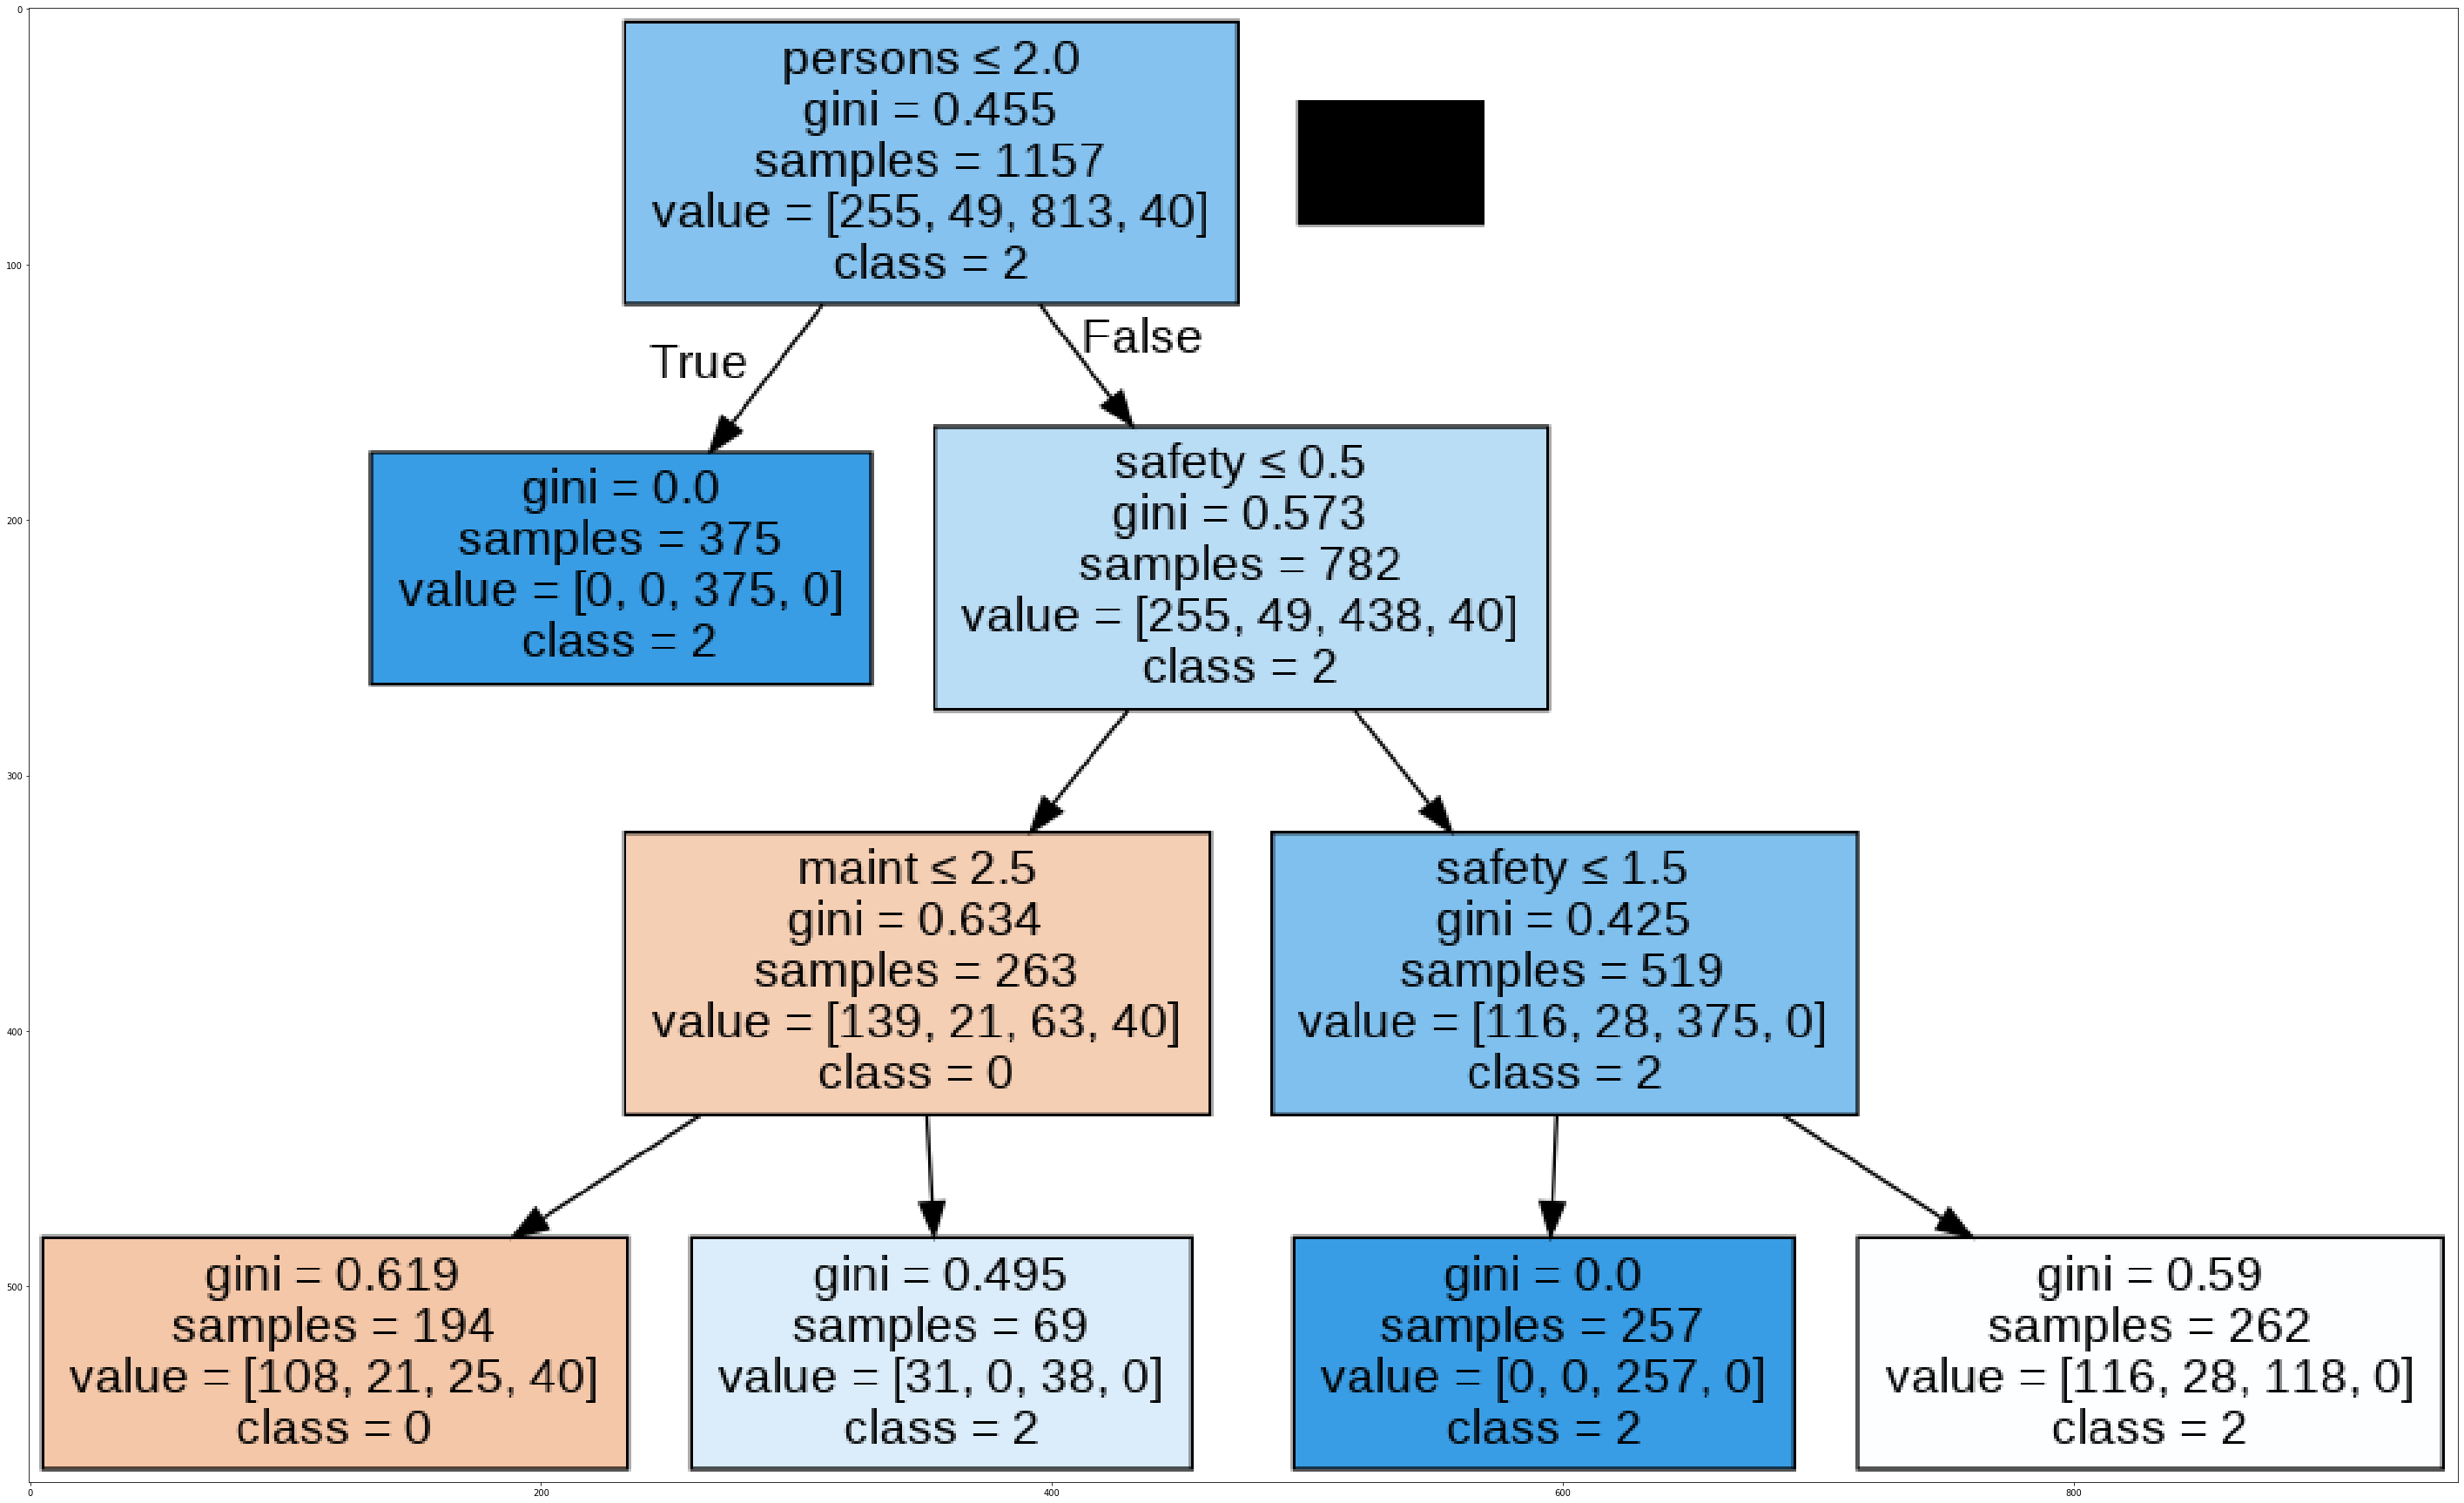

In [ ]:
dot_data = StringIO()
filename = "classtree.png"
featureNames = df.columns[0:6]
targetNames = df["class"].unique().tolist()
y_trainset = y_trainset.astype('str')
out=tree.export_graphviz(classTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')